/home/rmqlife/work/homework/comp790-58/hw2/Datasets/Dataset 1/images/pedxing-seq3/00007434.jpg
12


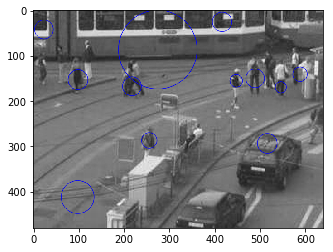

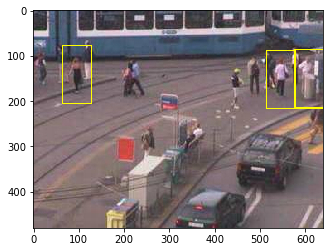

/home/rmqlife/work/homework/comp790-58/hw2/Datasets/Dataset 1/images/pedxing-seq3/00007534.jpg
10


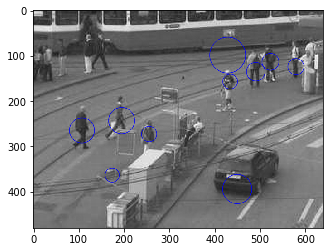

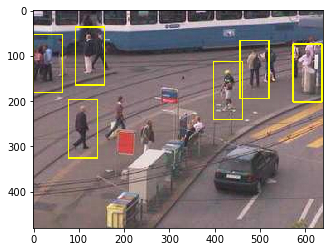

/home/rmqlife/work/homework/comp790-58/hw2/Datasets/Dataset 1/images/pedxing-seq3/00007634.jpg
11


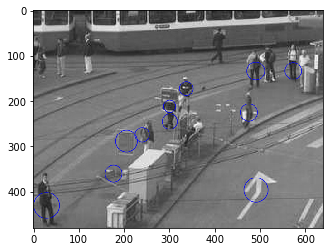

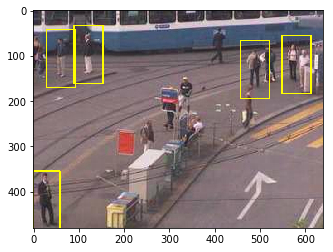

/home/rmqlife/work/homework/comp790-58/hw2/Datasets/Dataset 1/images/pedxing-seq3/00007734.jpg
8


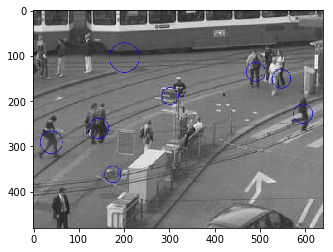

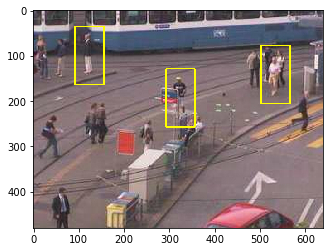

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import util


# Malisiewicz et al.
def non_max_suppression(boxes, overlapThresh):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []

    # if the bounding boxes integers, convert them to floats --
    # this is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    # initialize the list of picked indexes	
    pick = []

    # grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlapThresh)[0])))

    # return only the bounding boxes that were picked using the
    # integer data type
    return boxes[pick].astype("int")
 

    
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

d = "/home/rmqlife/work/homework/comp790-58/hw2/Datasets/Dataset 1/images/pedxing-seq3"
flist = util.get_filelist_ext(d,ext='jpg')

tracker = cv2.TrackerMIL_create()

bg = cv2.imread(flist[0], cv2.IMREAD_GRAYSCALE)
for i in range(1,100,1):
    print flist[i]
    im = cv2.imread(flist[i],cv2.IMREAD_GRAYSCALE)
    diff = np.abs(im.astype(float) - bg.astype(float))
    diff = diff.astype('uint8')
    #diff = (diff>10).astype('uint8')*255
    blobs = blob_filter(im)
    plt.imshow(blobs,cmap='gray')
   
    plt.show()
    
    
    # detect people in the image
    (rects, weights) = hog.detectMultiScale(im, winStride=(4, 4), padding=(8, 8), scale=0.3)
    
    im = cv2.imread(flist[i])
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    # draw the original bounding boxes
    #for (x, y, w, h) in rects:
    #    cv2.rectangle(im, (x, y), (x + w, y + h), (0, 0, 255), 2)
        
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, overlapThresh=0.1)

    # draw the final bounding boxes
    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(im, (xA, yA), (xB, yB), (255, 255, 0), 2)    
    
    plt.imshow(im)
    plt.show()
    
    frame = im = cv2.imread(flist[i])

    # Draw bounding box
    if ok:
        # Tracking success
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
    else :
        # Tracking failure
        cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

19


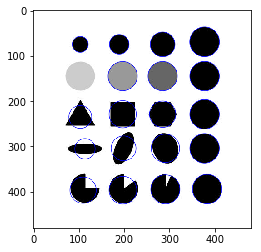

In [36]:
#!/usr/bin/python

# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

def blob_filter(im):
    # Setup SimpleBlobDetector parameters.
    params = cv2.SimpleBlobDetector_Params()

    # Change thresholds
    params.minThreshold = 10
    params.maxThreshold = 200


    # Filter by Area.
    params.filterByArea = True
    params.minArea = 20*20

    # Filter by Circularity
    params.filterByCircularity = False
    params.minCircularity = 0.1

    # Filter by Convexity
    params.filterByConvexity = False
    params.minConvexity = 0.87

    # Filter by Inertia
    params.filterByInertia = False
    params.minInertiaRatio = 0.01

    # Create a detector with the parameters
    ver = (cv2.__version__).split('.')
    if int(ver[0]) < 3 :
        detector = cv2.SimpleBlobDetector(params)
    else : 
        detector = cv2.SimpleBlobDetector_create(params)


    # Detect blobs.
    keypoints = detector.detect(im)

    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
    # the size of the circle corresponds to the size of blob
    print len(keypoints)
    im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    #DRAW_MATCHES_FLAGS_DEFAULT
    return im_with_keypoints

# Read image
im = cv2.imread("./blob.jpg", cv2.IMREAD_GRAYSCALE)

im_with_keypoints = blob_filter(im)

# Show blobs
plt.imshow(im_with_keypoints, cmap='gray')
plt.show()